### `Project 3: Ensemble Techniques - Term Deposit Subscription Prediction`

- Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Preparing the data to train a model

- Training and making predictions using a classification model

- Model evaluation


### `Domain` 
- Banking


### `Datasets Information:`


*bank-full.csv:* 

#### Input variables:
##### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

##### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

##### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

##### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)


### `Steps and tasks:`

#### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)

a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

2. Multivariate analysis (8 marks)

a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

#### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

#### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20) 

Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import numpy as np                                    # import numpy library
import pandas as pd                                   # import pandas library
import matplotlib.pyplot as plt                       # import matplotlib library
%matplotlib inline
import seaborn as sns                                 # import seaborn library
from sklearn.model_selection import train_test_split  # import function of data split
from sklearn import metrics                           # calculate accuracy measures and confusion matrix
from sklearn.linear_model import LogisticRegression   # import logistic regression for classification
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
                                                      # import the capabilities to compute the scores
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier       # import the decisiontreeclassifier
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from sklearn.ensemble import RandomForestClassifier   # import random forest 
from sklearn.ensemble import AdaBoostClassifier       # import adaptive boost
from sklearn.ensemble import BaggingClassifier        # import bagging classifier
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.classifier import ClassificationReport, ROCAUC
from scipy import stats
from sklearn.preprocessing import MinMaxScaler        # import normalization

In [2]:
Bank0 = pd.read_csv('Bank-full.csv')                   # read bank data

In [3]:
Bank0.head(10)                                         # Display the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### 1.1 Univariate analysis (12 marks)

In [4]:
Bank0.info()                                           # Check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
print('Count of unique value in column :')
Bank0.nunique()

Count of unique value in column :


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [7]:
List1 = Bank0.select_dtypes(include=['object']).columns.tolist()   # Gather all Catagorical Data Columns
List2 = Bank0.select_dtypes(include=['int64']).columns.tolist()    # Gather all Numerical Data Columns

In [8]:
Bank0.shape                    # Check Shape

(45211, 17)

In [9]:
Bank0.isnull().sum()          # Check Null Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

##### Insight: 
There is no NA data. So far we do not need to do additional changes to the dataframe considering missing values.

###### ----- Numerical Variables-------------------------------------------------------------------------------------------------------------------

In [10]:
Bank0.describe().transpose()             # statistic Summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### Insight: 
For balance, duration, pdays, previous, there exist outliers, but need to verify with the univariate plots to check whether the outliers need to be removed.

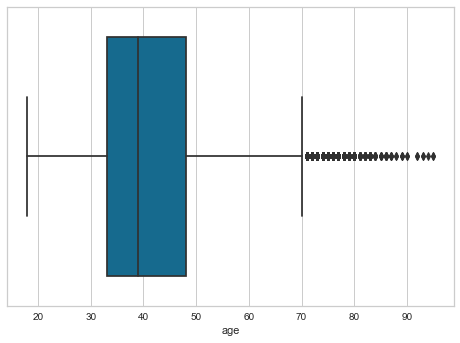

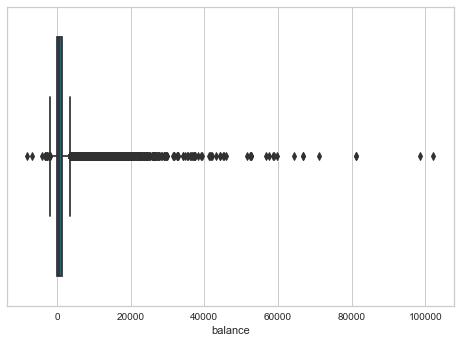

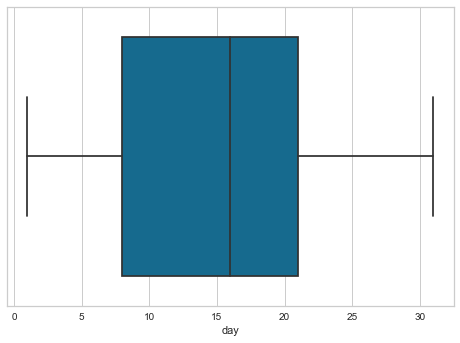

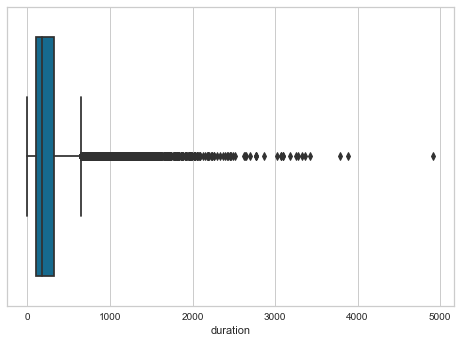

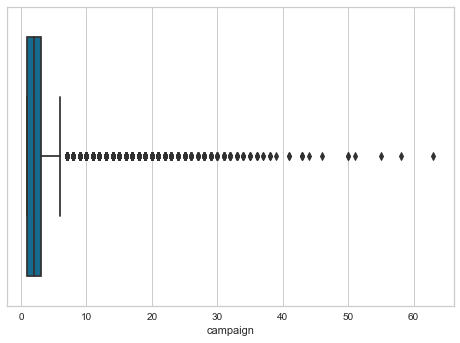

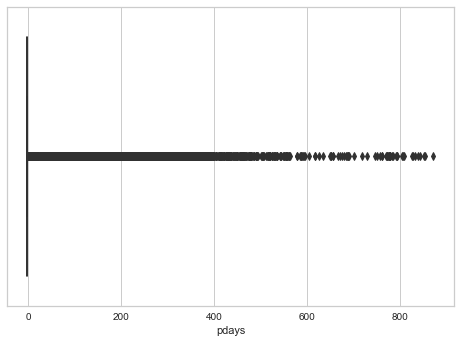

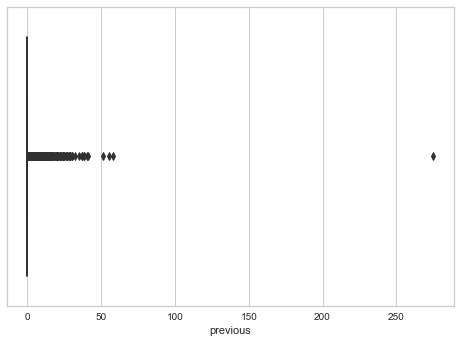

In [11]:
for x in List2:
    sns.boxplot(Bank0[x])
    plt.show()

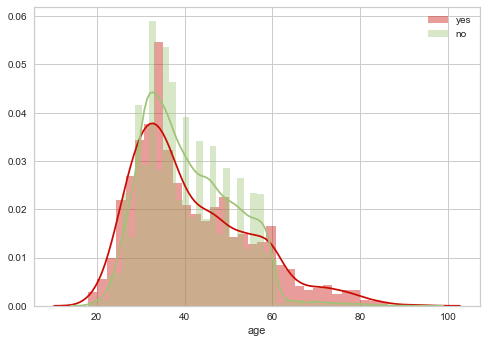

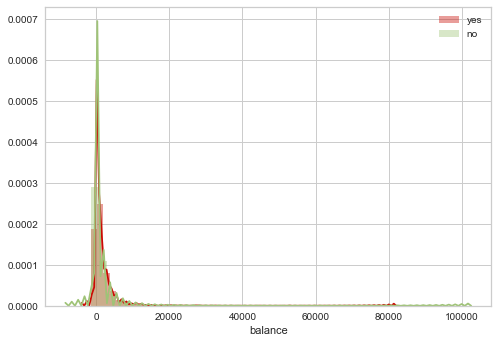

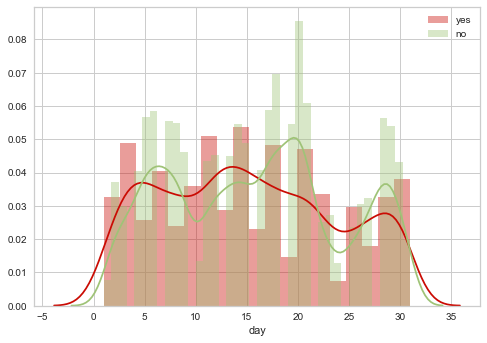

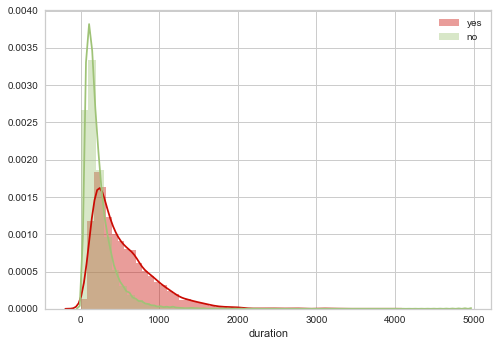

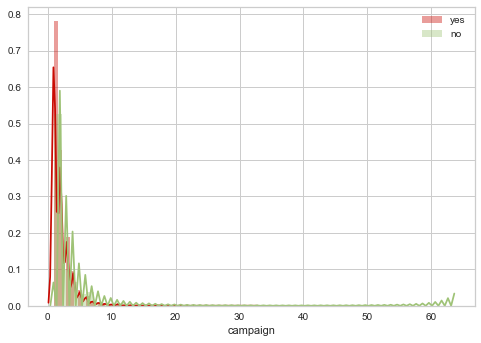

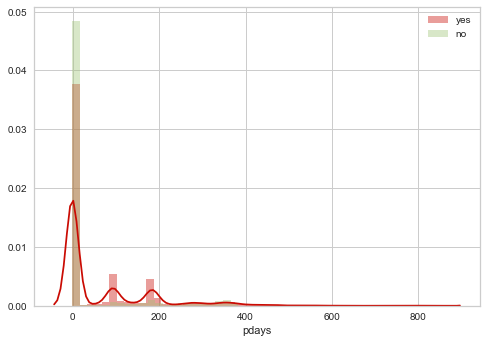

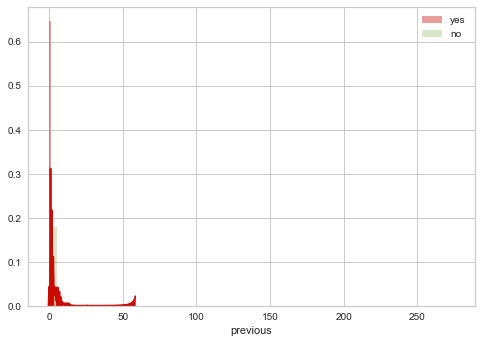

In [12]:
for x in List2:
    sns.distplot(Bank0[Bank0['Target']=='yes'][x],color='r',label='yes')
    sns.distplot(Bank0[Bank0['Target']=='no'][x],color='g',label='no')
    plt.legend()
    #sns.distplot(Bank[x], bins = 20)
    plt.show()

##### Insight: 
The plots indicated that we need to either remove some of the outliers or replace them with the mean values:

(1) We may not need to handle the outliers for age. Those people above 70 years old are more likely to subscribe to the term deposit.

(2) For duration, people with higher value of duration will more likely to accept the term option. The cutoff value should be set as ~2500.

(3) No significant difference for the balance, campaign, previous. Outliers can be handled using the two previously mentioned method.

(4) It is better to change pdays to a catagorical data.

In [13]:
Bank = Bank0.copy()
for x in ['balance']:
    Q1 = Bank0[x].quantile(0.25)
    Q3 = Bank0[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = Bank0[x].mean()  
    upper = Q3 + 1.5 * IQR                # handle outlier of balance
    Bank0.loc[Bank0[x] > upper , x] = np.nan
    lower = Q1 - 1.5 * IQR
    Bank0.loc[Bank0[x] < lower , x] = np.nan
    Bank0.fillna(mean,inplace=True)

In [14]:
mean = Bank0['duration'].mean()                       # handle outlier of duration
Bank0.loc[Bank0.duration > 2500, 'duration'] = np.nan
Bank0.fillna(mean,inplace=True)

In [15]:
for x in ['campaign']:
    Q1 = Bank0[x].quantile(0.25)
    Q3 = Bank0[x].quantile(0.75)
    IQR = Q3 - Q1
    median = Bank0[x].median()  
    upper = Q3 + 1.5 * IQR                # handle outlier of campaign
    Bank0.loc[Bank0[x] > upper , x] = np.nan
    lower = Q1 - 1.5 * IQR
    Bank0.loc[Bank0[x] < lower , x] = np.nan
    Bank0.fillna(median,inplace=True)

In [16]:
# make pdays as catagorical numbers 
Bank0.loc[Bank0.pdays > -1, 'pdays'] = np.nan
Bank0.fillna(0,inplace=True)

In [17]:
median = Bank0['previous'].median()                       # handle outlier of previous
Bank0.loc[Bank0.previous > 50, 'previous'] = np.nan
Bank0.fillna(median,inplace=True)

In [18]:
Bank0.describe().transpose()     # Check the statistics

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.000000,95.0
balance,45211.0,716.118214,829.009940,-1944.0,73.0,449.0,1362.272058,3462.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.000000,31.0
duration,45211.0,256.699891,248.944177,0.0,103.0,180.0,318.000000,2485.0
campaign,45211.0,2.121143,1.270890,1.0,1.0,2.0,3.000000,6.0
pdays,45211.0,-0.817367,0.386369,-1.0,-1.0,-1.0,-1.000000,0.0
previous,45211.0,0.570613,1.856184,0.0,0.0,0.0,0.000000,41.0


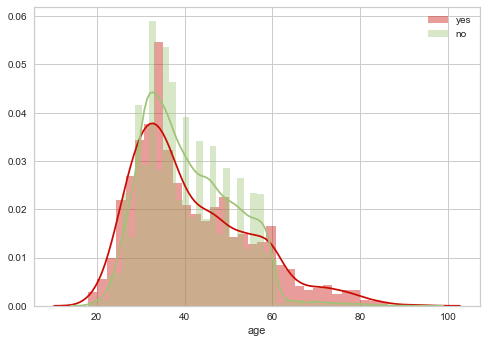

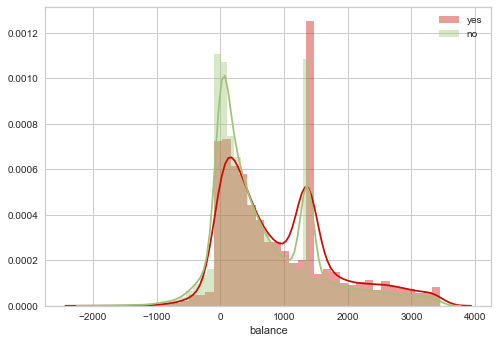

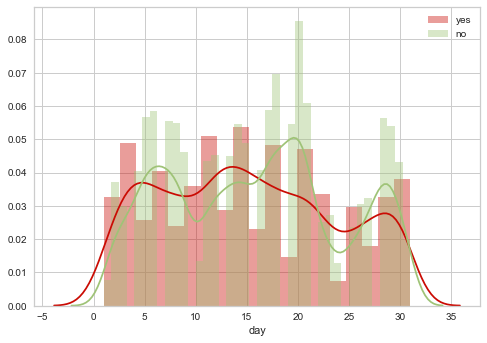

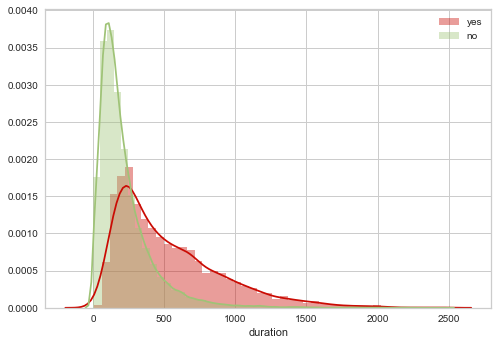

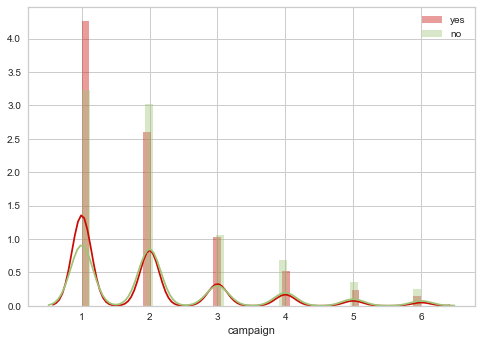

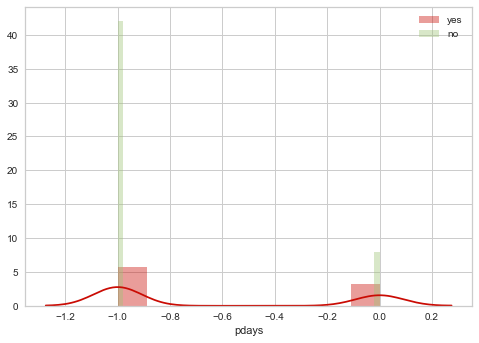

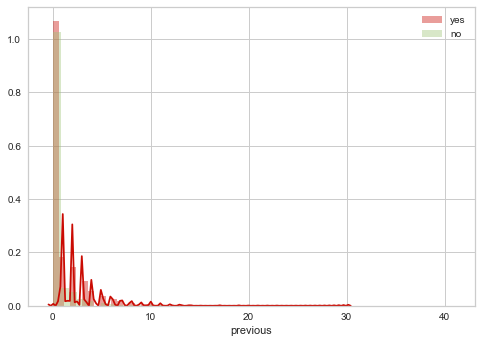

In [19]:
for x in List2:
    sns.distplot(Bank0[Bank0['Target']=='yes'][x],color='r',label='yes')
    sns.distplot(Bank0[Bank0['Target']=='no'][x],color='g',label='no')
    plt.legend()
    #sns.distplot(Bank[x], bins = 20)
    plt.show()

###### -----Categorical Variables-------------------------------------------------------------------------------------------------------------------

In [20]:
print('Count of unique value in column :')
Bank0.nunique()

Count of unique value in column :


age            77
job            12
marital         3
education       4
default         2
balance      4163
housing         2
loan            2
contact         3
day            31
month          12
duration     1551
campaign        6
pdays           2
previous       37
poutcome        4
Target          2
dtype: int64

In [21]:
print('Value counts of all categorical columns:')
for x in List1:
    print(Bank0.groupby(x)[x].count())                                 # count categorical columns

Value counts of all categorical columns:
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
default
no     44396
yes      815
Name: default, dtype: int64
housing
no     20081
yes    25130
Name: housing, dtype: int64
loan
no     37967
yes     7244
Name: loan, dtype: int64
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64
month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: month, dtype: int64


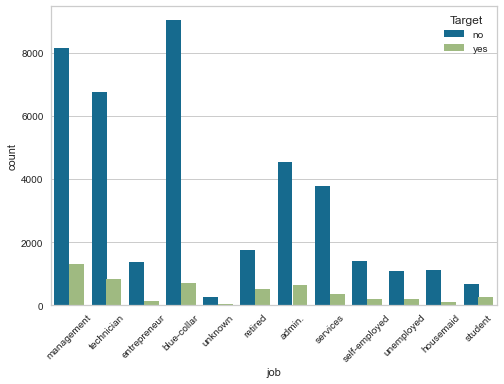

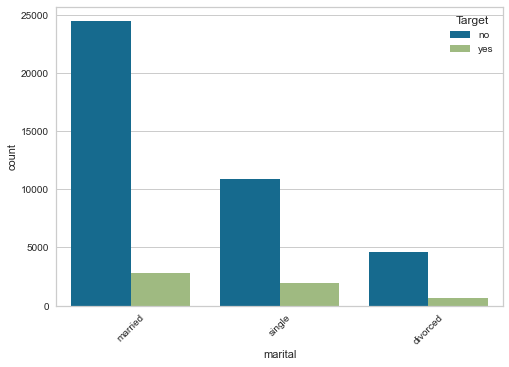

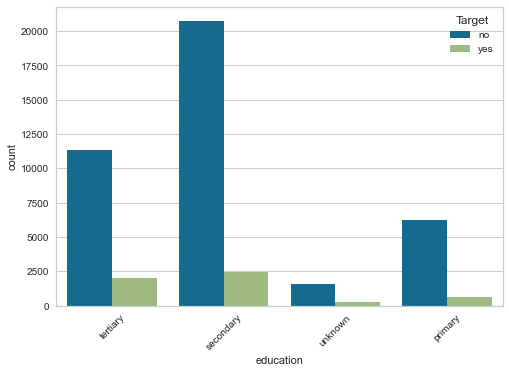

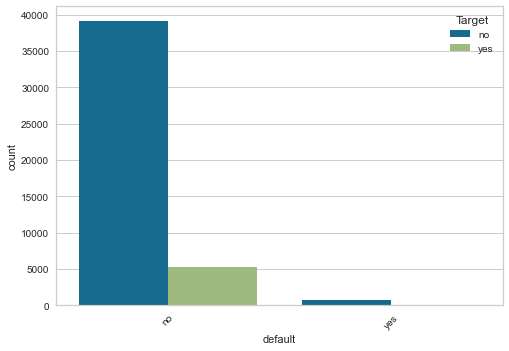

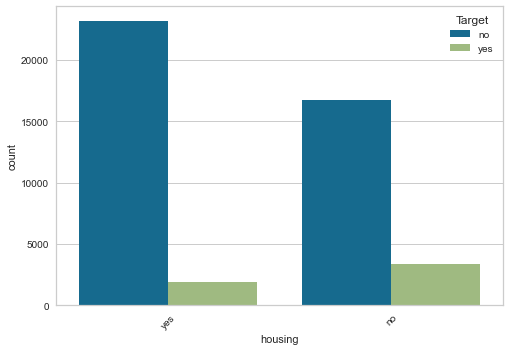

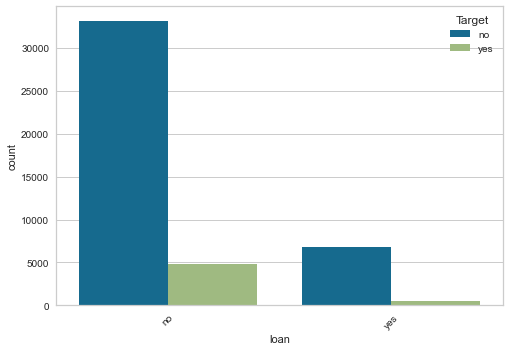

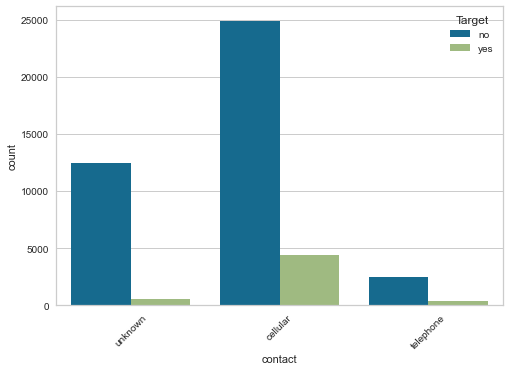

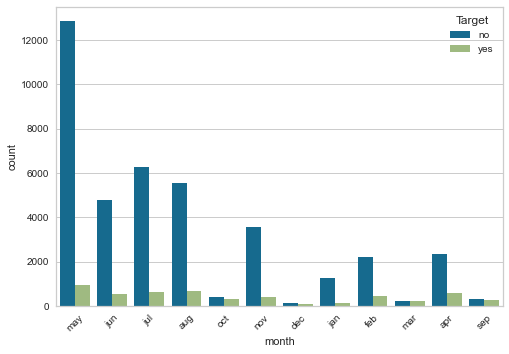

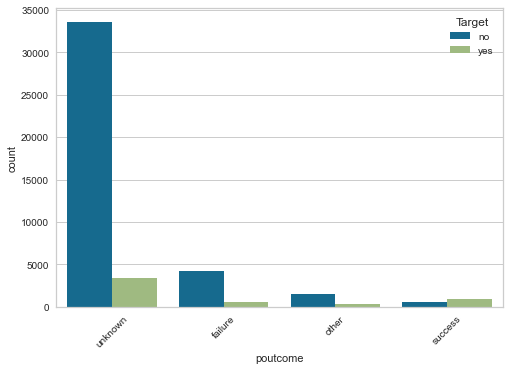

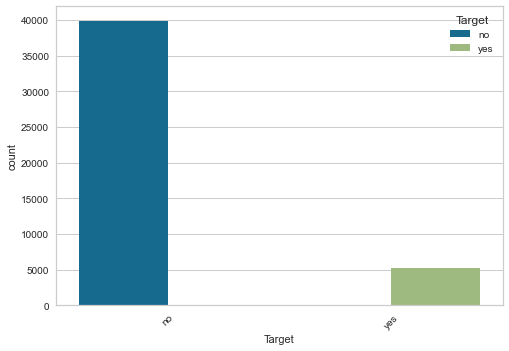

In [22]:
for x in List1:
    sns.countplot(Bank0[x],hue=Bank['Target'])
    plt.xticks(rotation=45)
    plt.show()


##### Insight: 
It seems that the catagorical data all have influence on the final decision for accepting the term. 

### 1.2 Multivariate analysis 

In [23]:
Bank0.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,687.695604,15.892290,220.403202,2.150318,-0.840890,0.493988
yes,41.670070,930.655449,15.158253,530.671605,1.900926,-0.639818,1.148988


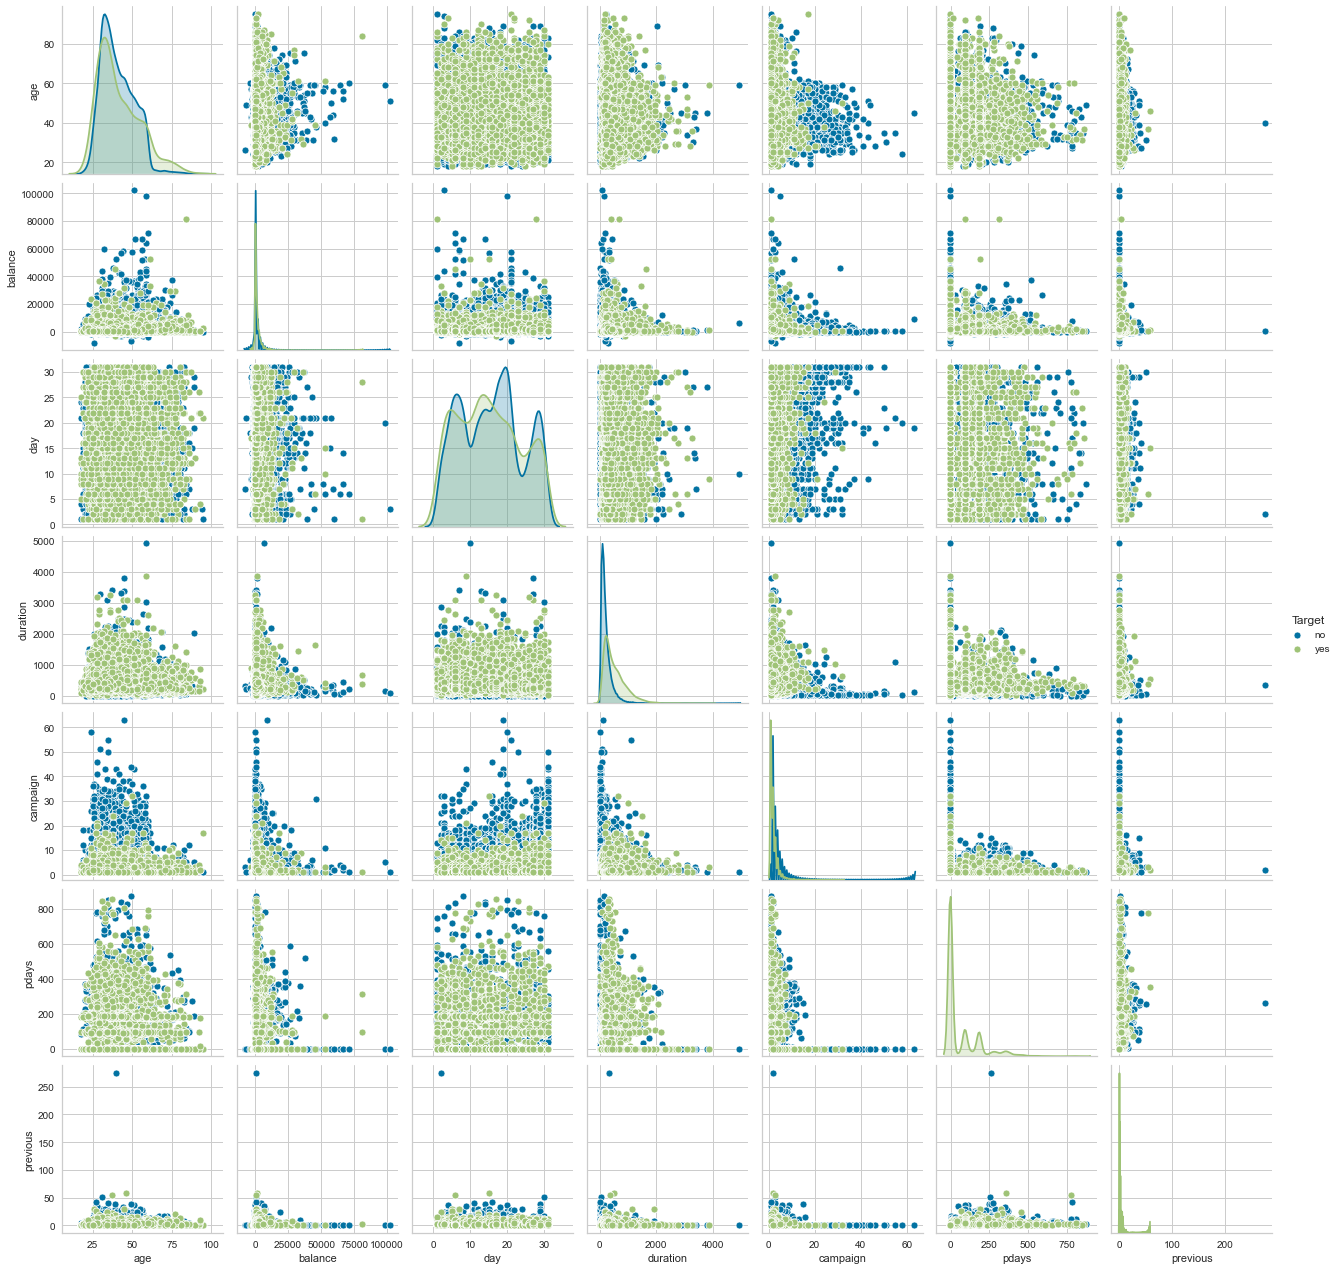

In [24]:
sns.pairplot(Bank,hue="Target",diag_kind='kde')                  # Pair Plots
plt.show()

In [25]:
Bank1 = Bank0.copy()
#Bank1.drop('pdays',axis=1,inplace=True)
Bank1 = pd.get_dummies(Bank1, drop_first=True, columns=List1)         # one-hot encoding to convert objects to numbers
Bank1.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143.0,5,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29.0,5,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2.0,5,76.0,1.0,-1.0,0.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506.0,5,92.0,1.0,-1.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1.0,5,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [26]:
Bank1.corr()                            #print the correlation table

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
age,1.000000,0.108691,-0.009120,-0.006387,0.027107,0.000753,0.002370,-0.044002,0.021792,0.086650,...,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.022967,0.035526,-0.000816,0.025155
balance,0.108691,1.000000,0.003624,0.040202,-0.022963,0.067490,0.046788,-0.039490,-0.006509,-0.001487,...,0.053352,0.040178,-0.094682,0.109696,0.046088,0.039324,0.016823,0.067965,-0.067468,0.094195
day,-0.009120,0.003624,1.000000,-0.032089,0.091093,-0.086174,-0.058931,-0.022898,-0.002312,0.003955,...,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.032952,-0.030321,0.086256,-0.028348
duration,-0.006387,0.040202,-0.032089,1.000000,-0.025825,0.006492,0.001548,0.009955,-0.001540,-0.008660,...,-0.024471,-0.007552,0.009530,-0.005889,0.012132,0.016266,-0.000815,0.044944,-0.006388,0.400580
campaign,0.027107,-0.022963,0.091093,-0.025825,1.000000,-0.082537,-0.005019,0.009614,0.004573,0.014043,...,0.005714,-0.019723,-0.034214,-0.075512,-0.059939,-0.040576,0.005382,-0.057620,0.082619,-0.063071
pdays,0.000753,0.067490,-0.086174,0.006492,-0.082537,1.000000,0.650347,-0.022339,-0.014950,-0.026101,...,-0.115897,0.048121,-0.000015,0.085957,0.093616,0.105523,0.435741,0.393379,-0.999630,0.167263
previous,0.002370,0.046788,-0.058931,0.001548,-0.005019,0.650347,1.000000,-0.020156,-0.009187,-0.017989,...,-0.073493,0.034384,0.003624,0.048616,0.067603,0.081245,0.361491,0.250931,-0.650064,0.113416
job_blue-collar,-0.044002,-0.039490,-0.022898,0.009955,0.009614,-0.022339,-0.020156,1.000000,-0.096585,-0.087951,...,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.001342,-0.053074,0.022194,-0.072083
job_entrepreneur,0.021792,-0.006509,-0.002312,-0.001540,0.004573,-0.014950,-0.009187,-0.096585,1.000000,-0.030969,...,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,-0.013506,-0.019111,0.014901,-0.019662
job_housemaid,0.086650,-0.001487,0.003955,-0.008660,0.014043,-0.026101,-0.017989,-0.087951,-0.030969,1.000000,...,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265,-0.016769,-0.009375,0.026059,-0.015195


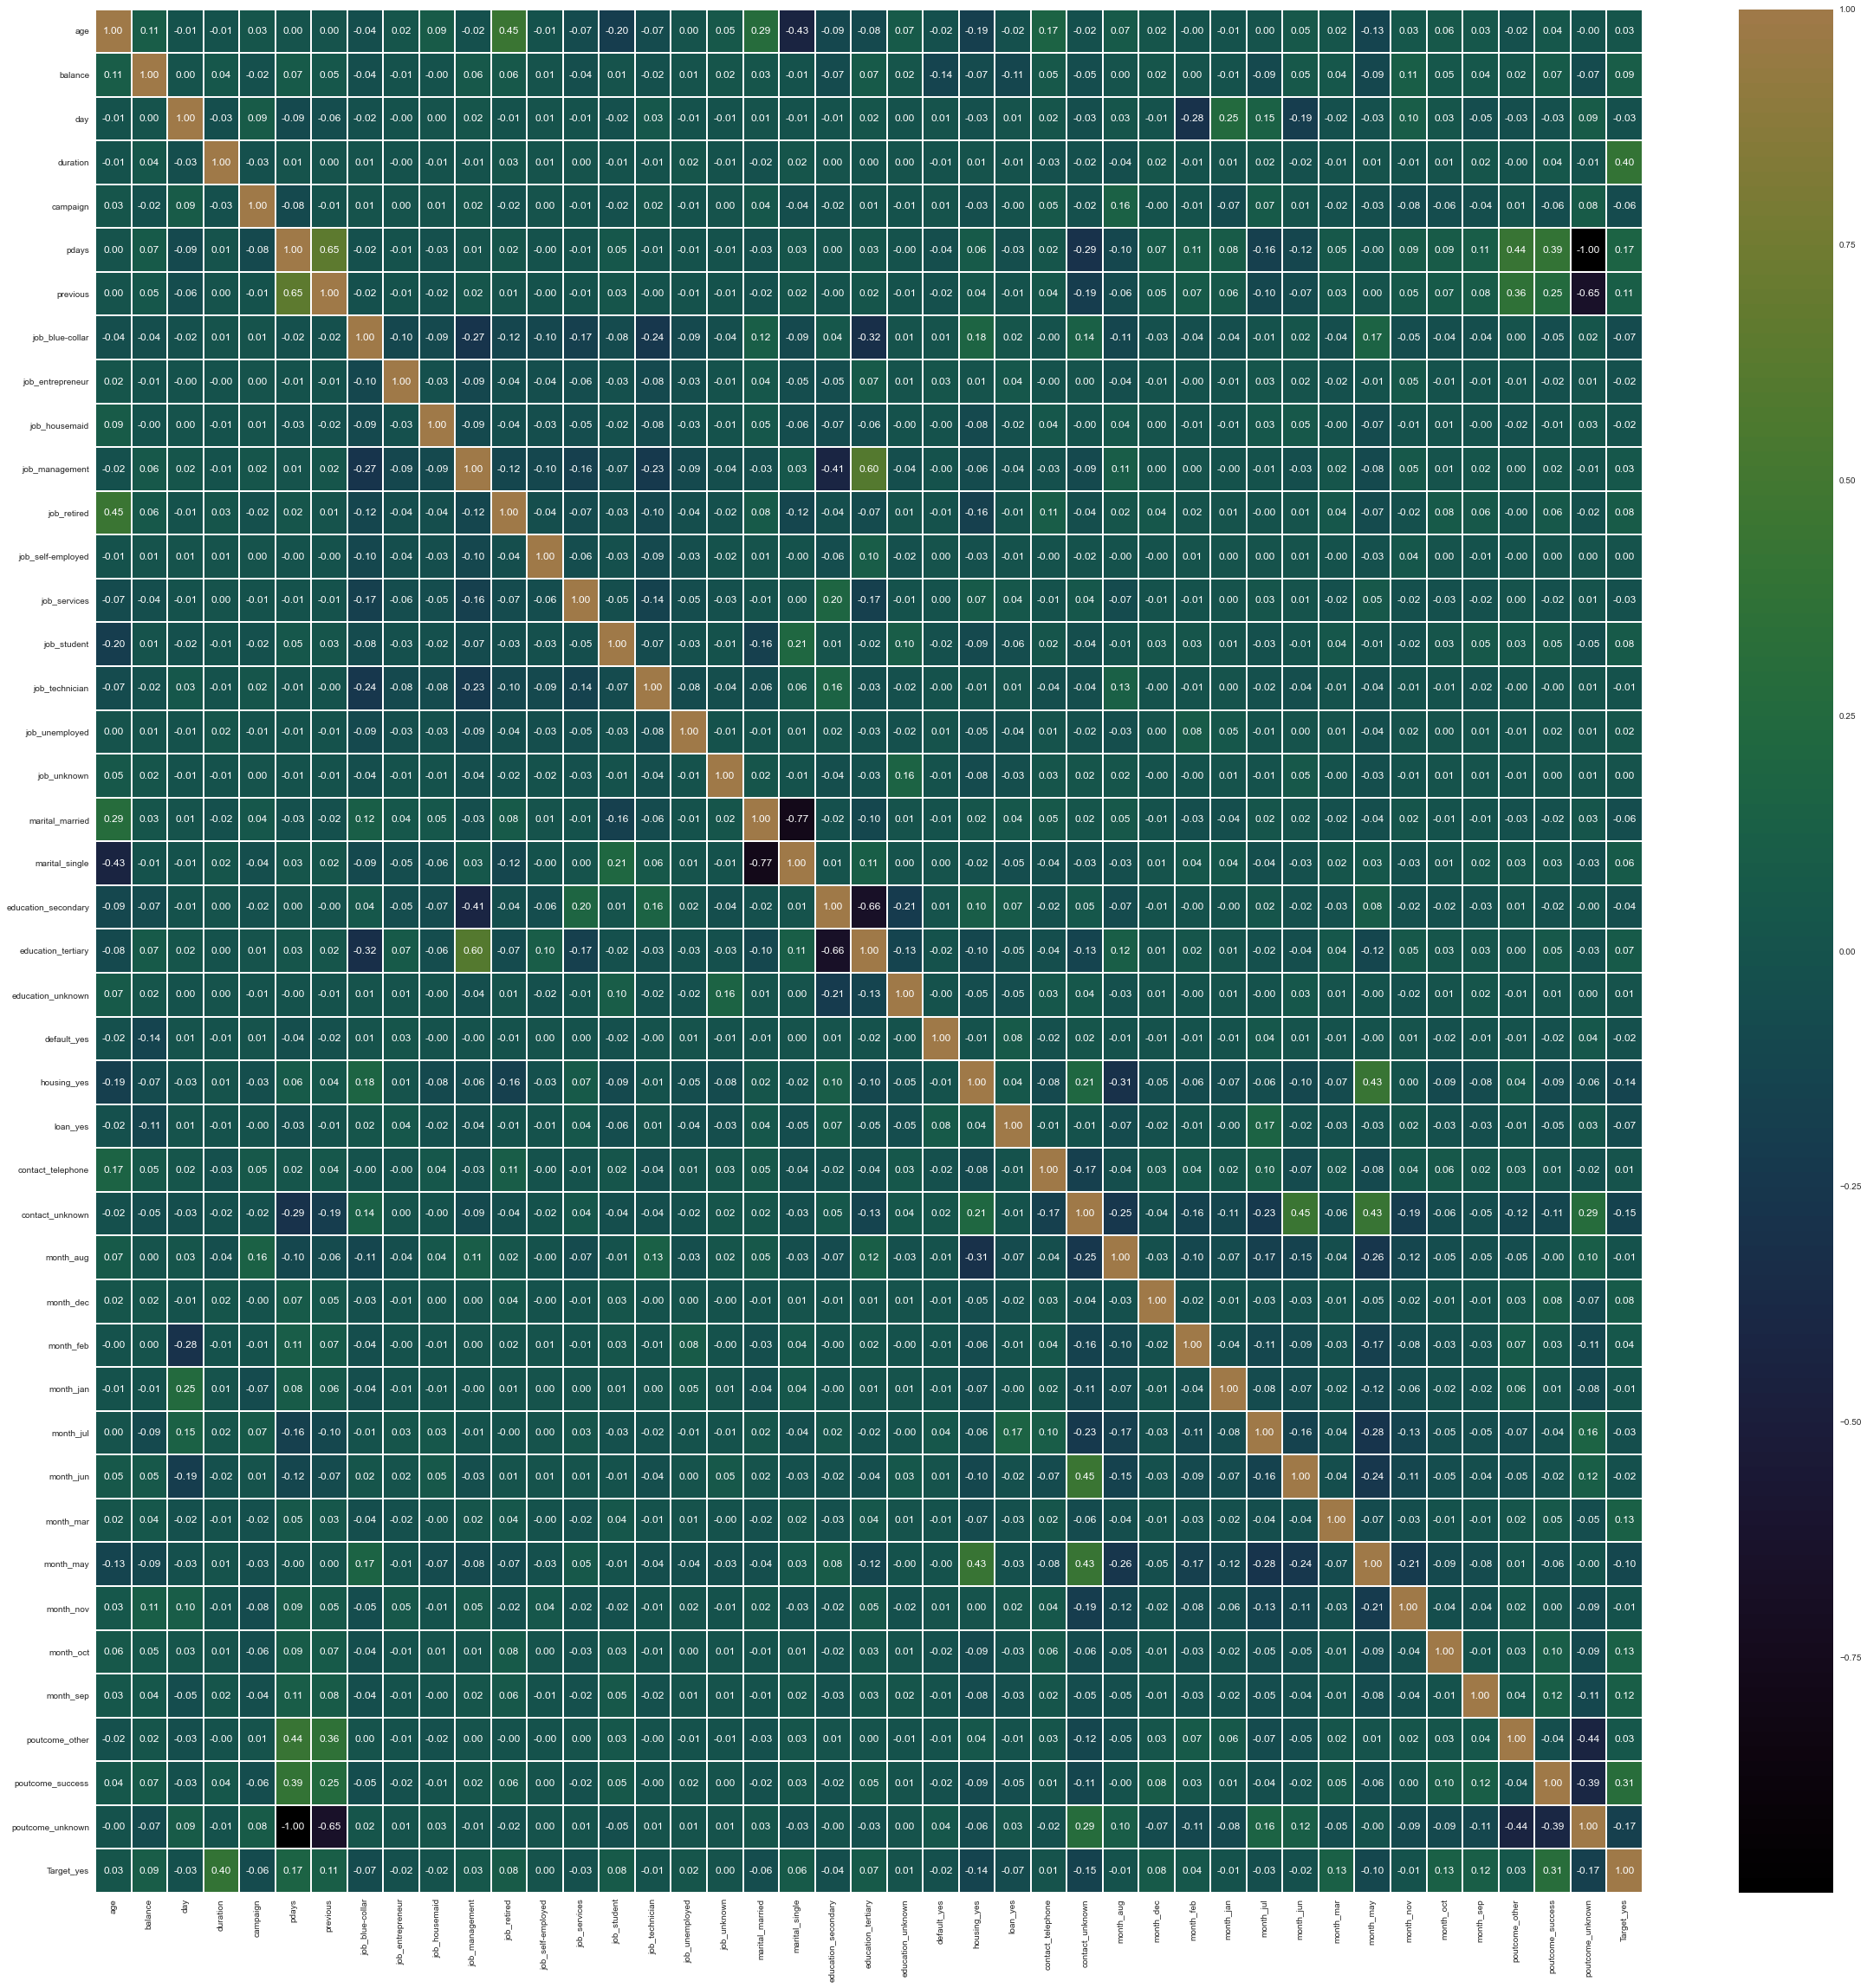

In [27]:
plt.figure(figsize=(40,40))
sns.heatmap(Bank1.corr(),annot=True, linewidths=1, fmt= '.2f', center = 1,cmap="cubehelix" )  # heatmap
plt.show()

##### Insight: 
There is weak correlation for some of the values. But we will keep the all variable for now.

### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [28]:
Bank2 = Bank0.copy()                                         # Make a copy of the original data
Bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.000000,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.000000,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.000000,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.000000,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.000000,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.000000,no,no,cellular,17,nov,977.0,3.0,-1.0,0.0,unknown,yes
45207,71,retired,divorced,primary,no,1729.000000,no,no,cellular,17,nov,456.0,2.0,-1.0,0.0,unknown,yes
45208,72,retired,married,secondary,no,1362.272058,no,no,cellular,17,nov,1127.0,5.0,0.0,3.0,success,yes
45209,57,blue-collar,married,secondary,no,668.000000,no,no,telephone,17,nov,508.0,4.0,-1.0,0.0,unknown,no


In [29]:
# normalize balance and duration
Bank2['balance'] = MinMaxScaler().fit_transform(Bank2[['balance']])
Bank2['duration'] = MinMaxScaler().fit_transform(Bank2[['duration']])
Bank2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,0.756012,yes,no,unknown,5,may,0.105030,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,0.364965,yes,no,unknown,5,may,0.060765,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,0.359970,yes,yes,unknown,5,may,0.030584,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,0.638180,yes,no,unknown,5,may,0.037022,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,0.359785,no,no,unknown,5,may,0.079678,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,0.512209,no,no,cellular,17,nov,0.393159,3.0,-1.0,0.0,unknown,yes
45207,71,retired,divorced,primary,no,0.679430,no,no,cellular,17,nov,0.183501,2.0,-1.0,0.0,unknown,yes
45208,72,retired,married,secondary,no,0.611593,no,no,cellular,17,nov,0.453521,5.0,0.0,3.0,success,yes
45209,57,blue-collar,married,secondary,no,0.483167,no,no,telephone,17,nov,0.204427,4.0,-1.0,0.0,unknown,no


In [30]:
Bank3 = pd.get_dummies(Bank2, drop_first=True, columns=List1)         # one-hot encoding to convert objects to numbers
Bank3.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,0.756012,5,0.105030,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,0.364965,5,0.060765,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,0.359970,5,0.030584,1.0,-1.0,0.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,0.638180,5,0.037022,1.0,-1.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,0.359785,5,0.079678,1.0,-1.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [31]:
Bank4 = Bank3.copy()                     # Tried to drop features, but decided to keep all features eventually
#Bank4 = Bank3.drop('age', axis = 1)     # Try drop different variables here and rerun the rest of the alogrithm

In [32]:
X = Bank4.drop('Target_yes',axis=1)     # Feature columns
Y = Bank4['Target_yes']                 # Prediction (1=True, 0=False)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

x_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
35272,39,0.611593,7,0.016097,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10705,44,0.479282,16,0.090946,2.0,-1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
43536,46,0.438957,26,0.187123,2.0,0.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6960,55,0.374584,28,0.069215,1.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
41892,28,0.391417,19,0.049497,2.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,30,0.666667,30,0.094970,1.0,-1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13927,47,0.427488,10,0.191549,4.0,-1.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
919,37,0.373289,7,0.060362,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
38467,48,0.404735,15,0.021730,5.0,-1.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
y_train

35272    0
10705    0
43536    1
6960     0
41892    0
        ..
34140    0
13927    1
919      0
38467    0
10742    0
Name: Target_yes, Length: 31647, dtype: uint8

In [34]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Bank.index)) * 100))   # check whether the split is correct
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Deliverable – 3 (create the ensemble model) – (30)

1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

#### Logistic Regression Model

In [35]:
# Fit the model on train using logistic regression
model = LogisticRegression(solver="liblinear",random_state = 50)
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2          3         4         5         6  \
0 -0.001214  0.79738  0.008249  10.296973 -0.154079  0.037803  0.024761   

          7         8         9  ...        33        34        35        36  \
0 -0.328198 -0.432663 -0.396976  ...  0.265035  1.475834 -0.481736 -0.970939   

         37       38        39        40        41  intercept  
0  0.740824  0.79194  0.194722  2.382589  0.034455  -2.670619  

[1 rows x 43 columns]


In [36]:
model_score_train = model.score(x_train, y_train)
print('Training Accuracy', model_score_train)                           # Find the model score on the training data

Training Accuracy 0.9007804847220906


In [37]:
model_score_test = model.score(x_test, y_test)
print('Testing Accuracy', model_score_test)                                # Find the model score on the testing data

Testing Accuracy 0.9057800058979653


In [38]:
cm = confusion_matrix( y_test, y_predict)
cm                                                    # calculate confusion matrix

array([[11721,   309],
       [  969,   565]], dtype=int64)

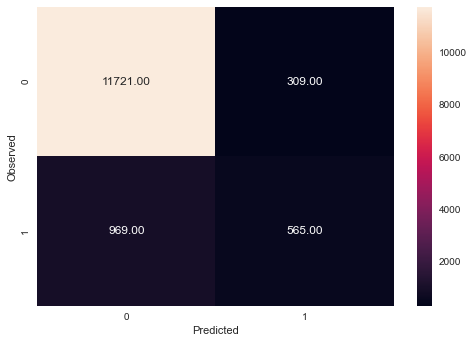

In [39]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )  # Plot confusion matrix as heat map
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [40]:
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.3683181225554107
Precision: 0.6464530892448512
F1 Score: 0.4692691029900332
Roc Auc Score: 0.6713161685096255


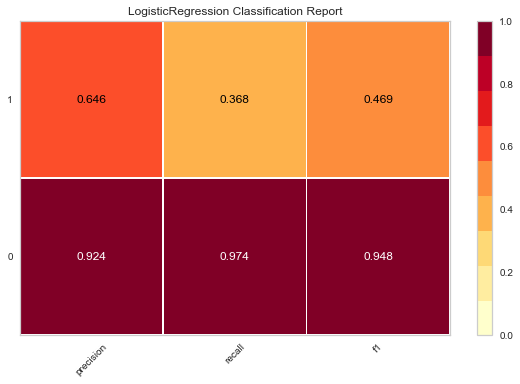

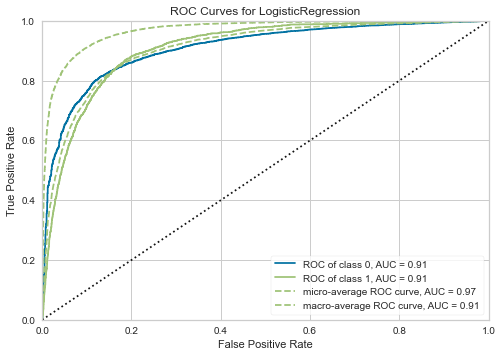

In [41]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(LogisticRegression(solver="liblinear",random_state = 42))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(LogisticRegression(solver="liblinear",random_state = 42))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#### Decision Tree Model

In [42]:
# Fit the model on train using Decision Tree model
model_entropy=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')  # Pruning option is applied

In [43]:
model_entropy.fit(x_train, y_train)                   # model fit

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       presort=False, random_state=50)

In [44]:
print('Decision tree training score:', model_entropy.score(x_train, y_train))            # performance on training data
acc_test_dtree = model_entropy.score(x_test, y_test)
print('Decision tree testing score:',acc_test_dtree)              # performance on test data

Decision tree training score: 0.9000853161437103
Decision tree testing score: 0.9036419935122383


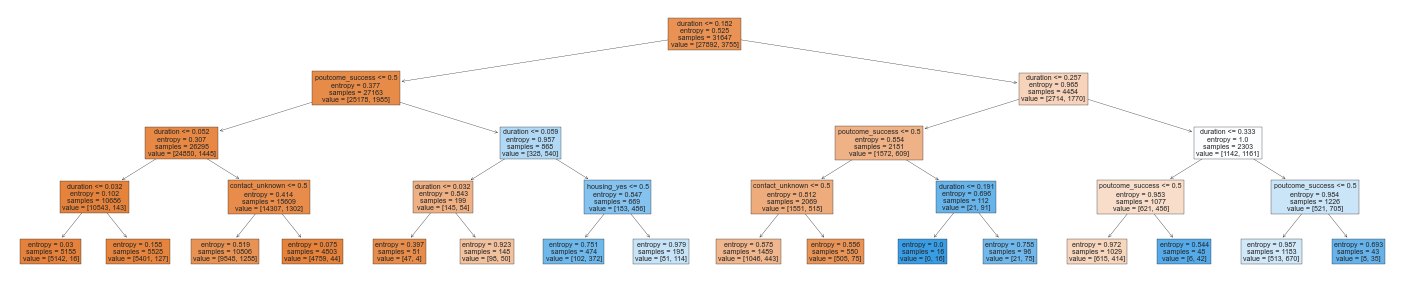

In [45]:
fig = plt.figure(figsize=(25,5))
_ = tree.plot_tree(model_entropy, feature_names=list(x_train), filled=True)  
# the graphviz option does not work, used this alternative method for visualization

In [46]:
y_predict_dtree = model_entropy.predict(x_test)
cm_dtree= confusion_matrix( y_test, y_predict_dtree)
cm_dtree         

array([[11715,   315],
       [  992,   542]], dtype=int64)

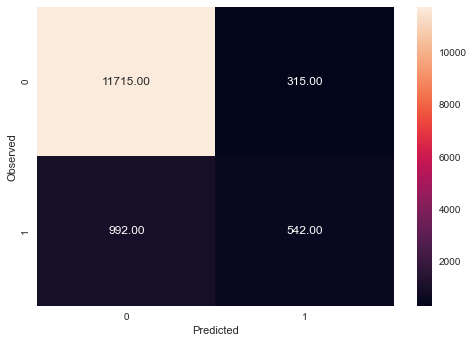

In [47]:
sns.heatmap(cm_dtree, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )  # Plot confusion matrix as heat map
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [48]:
print("Recall:",recall_score(y_test,y_predict_dtree))
print("Precision:",precision_score(y_test,y_predict_dtree))
print("F1 Score:",f1_score(y_test,y_predict_dtree))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_dtree))

Recall: 0.3533246414602347
Precision: 0.632438739789965
F1 Score: 0.4533667921371811
Roc Auc Score: 0.6635700514034341


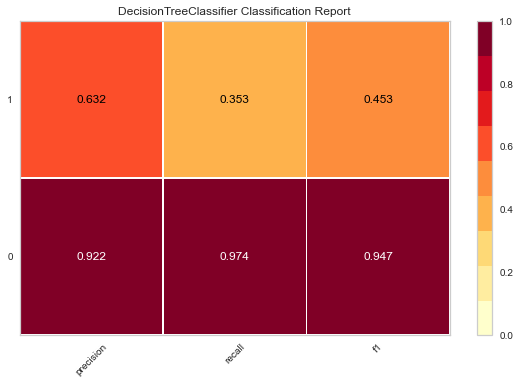

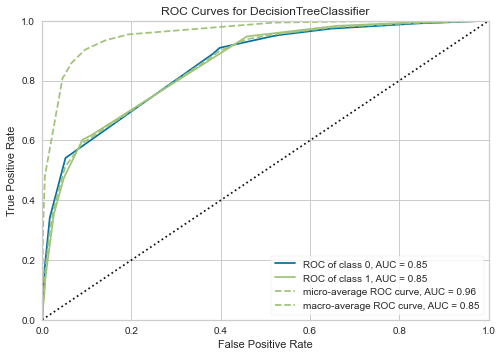

In [49]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model_entropy)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model_entropy)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

#### Random Forest Model

In [50]:
rfcl = RandomForestClassifier(n_estimators = 50)      # Model fit
rfcl = rfcl.fit(x_train, y_train)

In [51]:
pred_train_RF = rfcl.predict(x_train)                  # Output training and testing scores
acc_train_RF = accuracy_score(y_train, pred_train_RF)
print('the training score', acc_train_RF)
pred_test_RF = rfcl.predict(x_test)
acc_test_RF = accuracy_score(y_test, pred_test_RF)
print('the testing score', acc_test_RF)

the training score 0.9998736057130218
the testing score 0.9060011795930404


In [52]:
y_predict_RF = rfcl.predict(x_test)
cm_RF= confusion_matrix( y_test, y_predict_RF)
cm_RF   

array([[11712,   318],
       [  957,   577]], dtype=int64)

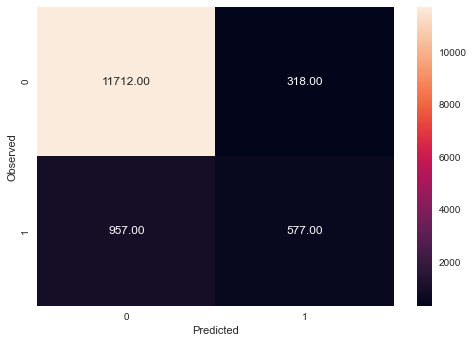

In [53]:
sns.heatmap(cm_RF, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )  # Plot confusion matrix as heat map
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [54]:
print("Recall:",recall_score(y_test,y_predict_RF))
print("Precision:",precision_score(y_test,y_predict_RF))
print("F1 Score:",f1_score(y_test,y_predict_RF))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_RF))

Recall: 0.37614080834419816
Precision: 0.6446927374301676
F1 Score: 0.47509263071222724
Roc Auc Score: 0.6748534465661141


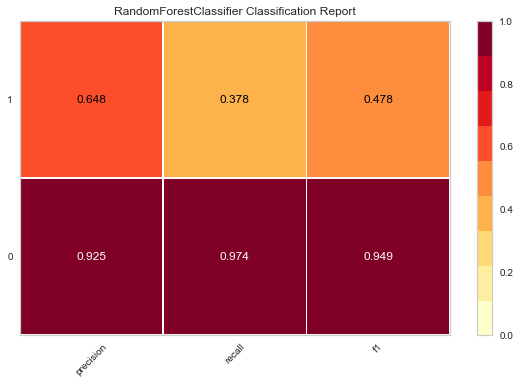

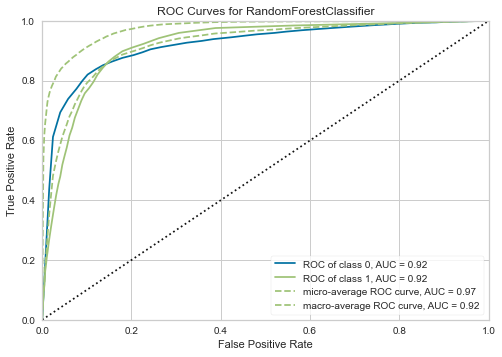

In [55]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#### Adaboost Ensemble Algorithm

In [56]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=1, random_state=50)   # model fit 
abcl = abcl.fit(x_train, y_train)

In [57]:
pred_train_AB = abcl.predict(x_train)                  # Output training and testing scores
acc_train_AB = accuracy_score(y_train, pred_train_AB)
print('the training score', acc_train_AB)
pred_test_AB = abcl.predict(x_test)
acc_test_AB = accuracy_score(y_test, pred_test_AB)
print('the testing score', acc_test_AB)

the training score 0.9016652447309381
the testing score 0.9037894426422884


In [72]:
y_predict_AB = abcl.predict(x_test)
cm_AB= confusion_matrix( y_test, y_predict_AB)
cm_AB   

array([[11660,   370],
       [  935,   599]], dtype=int64)

In [74]:
print("Recall:",recall_score(y_test,y_predict_AB))
print("Precision:",precision_score(y_test,y_predict_AB))
print("F1 Score:",f1_score(y_test,y_predict_AB))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_AB))

Recall: 0.39048239895697523
Precision: 0.6181630546955624
F1 Score: 0.4786256492209348
Roc Auc Score: 0.6798629783646056


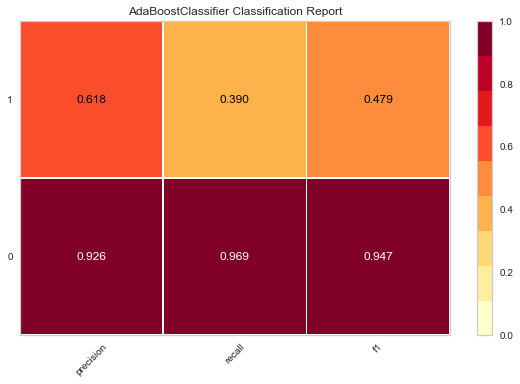

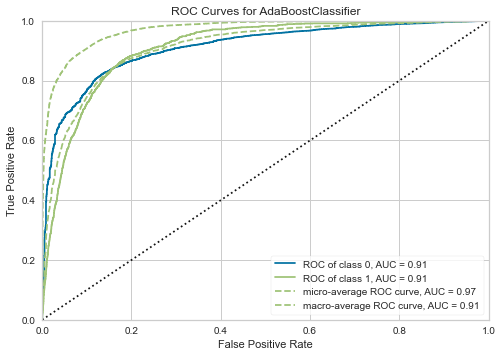

In [75]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(abcl)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(abcl)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

#### Bagging Classifier Algorithm

In [76]:
bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=50)  # fitting the model
bgcl = bgcl.fit(x_train, y_train)

In [77]:
pred_train_BG = bgcl.predict(x_train)                  # Output training and testing scores
acc_train_BG = accuracy_score(y_train, pred_train_BG)
print('the training score', acc_train_BG)
pred_test_BG = bgcl.predict(x_test)
acc_test_BG = accuracy_score(y_test, pred_test_BG)
print('the testing score', acc_test_BG)

the training score 0.9957341928144848
the testing score 0.9069595989383663


In [78]:
y_predict_BG = bgcl.predict(x_test)
cm_BG= confusion_matrix( y_test, y_predict_BG)
cm_BG  

array([[11607,   423],
       [  839,   695]], dtype=int64)

In [79]:
print("Recall:",recall_score(y_test,y_predict_BG))
print("Precision:",precision_score(y_test,y_predict_BG))
print("F1 Score:",f1_score(y_test,y_predict_BG))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_BG))

Recall: 0.4530638852672751
Precision: 0.6216457960644007
F1 Score: 0.5241327300150829
Roc Auc Score: 0.7089508952520913


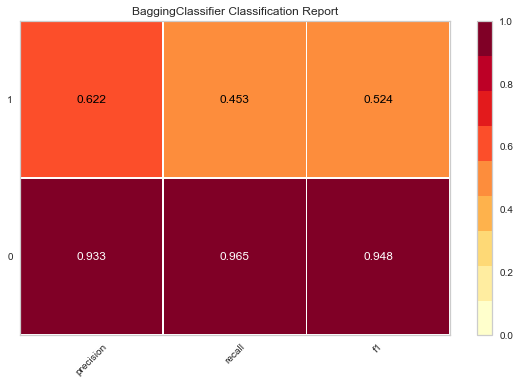

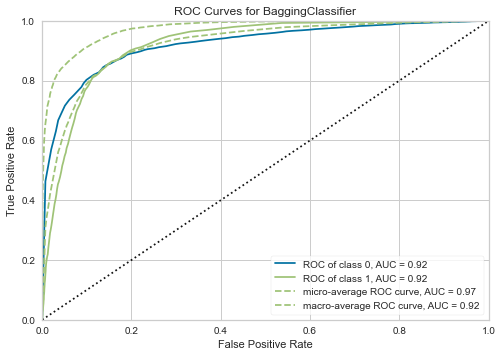

In [80]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(bgcl)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(bgcl)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [81]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': model_score_test, 
                          'precision':precision_score(y_test,y_predict),
                          'recall': recall_score(y_test,y_predict),
                          'f1': f1_score(y_test,y_predict),
                        'Roc Auc Score':roc_auc_score(y_test,y_predict_dtree)})
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1','Roc Auc Score']]
resultsDf


,Method,accuracy,precision,recall,f1,Roc Auc Score
0,Logistic Regression,0.90578,0.646453,0.368318,0.469269,0.66357


In [82]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_test_dtree,
                             'precision':precision_score(y_test,y_predict_dtree),
                             'recall': recall_score(y_test,y_predict_dtree),
                             'f1': f1_score(y_test,y_predict_dtree),
                             'Roc Auc Score':roc_auc_score(y_test,y_predict_dtree)})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [83]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_test_RF,
                             'precision':precision_score(y_test,y_predict_RF),
                             'recall': recall_score(y_test,y_predict_RF),
                             'f1': f1_score(y_test,y_predict_RF),
                             'Roc Auc Score':roc_auc_score(y_test,y_predict_RF)})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [84]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost Ensemble'], 'accuracy': acc_test_AB,
                             'precision':precision_score(y_test,y_predict_AB),
                             'recall': recall_score(y_test,y_predict_AB),
                             'f1': f1_score(y_test,y_predict_AB),
                             'Roc Auc Score':roc_auc_score(y_test,y_predict_AB)})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [85]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Ensemble'], 'accuracy': acc_test_BG,
                             'precision':precision_score(y_test,y_predict_BG),
                             'recall': recall_score(y_test,y_predict_BG),
                             'f1': f1_score(y_test,y_predict_BG),
                             'Roc Auc Score':roc_auc_score(y_test,y_predict_BG)})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [86]:
resultsDf

,Method,accuracy,precision,recall,f1,Roc Auc Score
0,Logistic Regression,0.905780,0.646453,0.368318,0.469269,0.663570
0,Decision Tree,0.903642,0.632439,0.353325,0.453367,0.663570
0,Random Forest,0.906001,0.644693,0.376141,0.475093,0.674853
0,Adaboost Ensemble,0.903789,0.618163,0.390482,0.478626,0.679863
0,Bagging Ensemble,0.906960,0.621646,0.453064,0.524133,0.708951


### Conclusion


##### `Model Performance`
Confusion matrix was plotted. 

- For True Positive (observed=1,predicted=1):*

Predicted that customer will accept term deposit and the customer accepted.

- False Positive (observed=0,predicted=1):*

Predicted that customer will accept term deposit, but the customer did not accept. 

- True Negative (observed=0,predicted=0):*

Predicted that customer will not accept term deposit and the customer did not accept. 

- False Negative (observed=1,predicted=0):*

Predicted customer will not accept term deposit, but the customer accepted. 

##### `Important Metric`

The bank wants to spend less to promote term deposit services, but wants a high success rate of actual acceptance. This means less number of false positive. Precision is the important metrix in this case. 

The logistic regreeion model, decision tree, random forest, adaboost and bagging have similar accuracy and precision value. The Adaboost is depending on the learning rate setup and potentially timeconsuming. In terms of the precision, Logistic Regression, Random Forest are slightly higher compared to other techniques. Hence, Logistic Regression and Random Forest are considered as the better model among 5 models for prediction. 

If only comparing all ensemble methods, Random Forest is the best one.